In [2]:
models = !ls ../data/models/

models

['4 - Baseline - Just join triples_e089e6d2328637218601e68ee1216f624e70d78f.txt',
 '5 - Model - Template Based - roots_e089e6d2328637218601e68ee1216f624e70d78f.txt']

In [46]:
model_results = {}

for model in models:
    
    with open('../data/models/' + model) as f:
        
        model_results[model] = [line[:-1] for line in f]

In [56]:
def print_entry_and_models(e):
    
    print(e)
    print('\n')
    
    idx = int(e.idx().split('_')[1])
    
    for model in models:
        
        print(model + "\n")
        print(model_results[model][idx])
        print("\n")

In [48]:
%run ../script/webnlg.py

In [5]:
test_with_lex = WebNLGCorpus.load('test_with_lex')

In [ ]:
e = test_with_lex.sample()

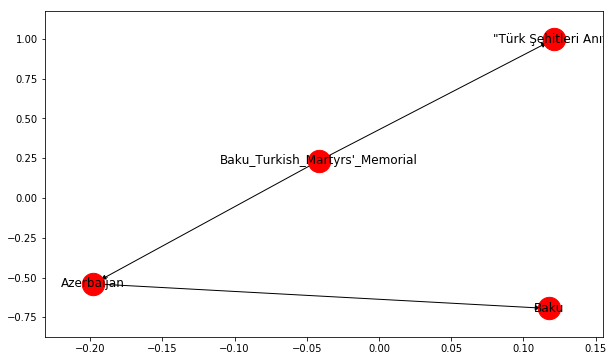

In [58]:
e.draw_graph()

In [57]:
print_entry_and_models(e)

Triple info: {'category': 'Monument', 'eid': 'Id537', 'idx': '0_536', 'ntriples': 3}

	Modified triples:

Azerbaijan | capital | Baku
Baku_Turkish_Martyrs'_Memorial | location | Azerbaijan
Baku_Turkish_Martyrs'_Memorial | nativeName | "Türk Şehitleri Anıtı"


	Lexicalizations:

The Baku Turkish Martyrs' Memorial, known locally as Türk Şehitleri Anıtı, is located in Baku, the capital city of Azerbaijan.


4 - Baseline - Just join triples_e089e6d2328637218601e68ee1216f624e70d78f.txt

Azerbaijan capital Baku Baku Turkish Martyrs' Memorial location Azerbaijan Baku Turkish Martyrs' Memorial nativeName Türk Şehitleri Anıtı 


5 - Model - Template Based - roots_e089e6d2328637218601e68ee1216f624e70d78f.txt

Baku is the capital of Azerbaijan. Baku Turkish Martyrs' Memorial is located in Azerbaijan. Türk Şehitleri Anıtı is the native name of Baku Turkish Martyrs' Memorial.


